<ipython-input-27-a6c274f02500>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/2_Integrated_Reviews_111545_with_Ratings.csv', error_bad_lines=False)


   Unnamed: 0    ItemCode  Rating  \
0           0  ateoz80EHr     5.0   
1           1  ateoz80EHr     5.0   
2           2  ateoz80EHr     5.0   
3           3  ateoz80EHr     5.0   
4           4  ateoz80EHr     4.0   

                                              Review           UserName Month  \
0                                      Super quality   Ramsheeq Mohamed   Feb   
1                                      Nice product.  Flipkart Customer   Feb   
2  You will not get any better product at this pr...               AJAY   Feb   
3                                               best  Flipkart Customer   Feb   
4                                            Love it       Vishal Walia   Feb   

   Year    UserCertified                Place  
0  2024  Certified Buyer  Malappuram District  
1  2024  Certified Buyer  Malappuram District  
2  2024  Certified Buyer  Malappuram District  
3  2024  Certified Buyer  Malappuram District  
4  2024  Certified Buyer  Malappuram District  


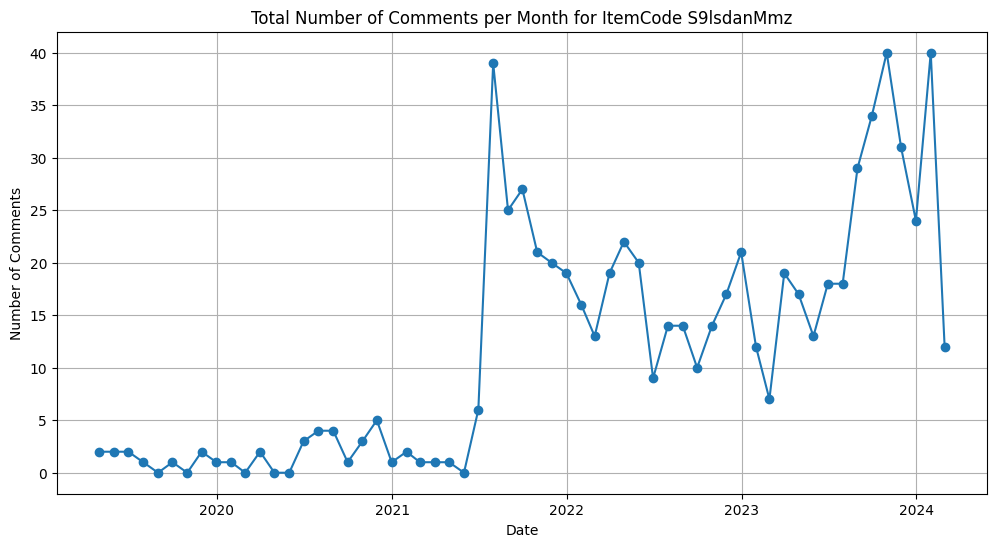

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/2_Integrated_Reviews_111545_with_Ratings.csv', error_bad_lines=False)

# Display the first few rows of the DataFrame to verify the data
print(df.head())

# Assuming 'Month' and 'Year' columns are already in datetime format
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str))

# Filter DataFrame for the specific ItemCode 'S9lsdanMmz'
df = df[df['ItemCode'] == 'S9lsdanMmz']

# Group by month and count the number of comments
monthly_comments = df.groupby(pd.Grouper(key='Date', freq='M')).size()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(monthly_comments.index, monthly_comments, marker='o')
plt.title('Total Number of Comments per Month for ItemCode S9lsdanMmz')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.grid(True)
plt.show()

Total Number of Comments in Each Year:
Date
2019     11
2020     24
2021    162
2022    189
2023    262
2024     52
dtype: int64


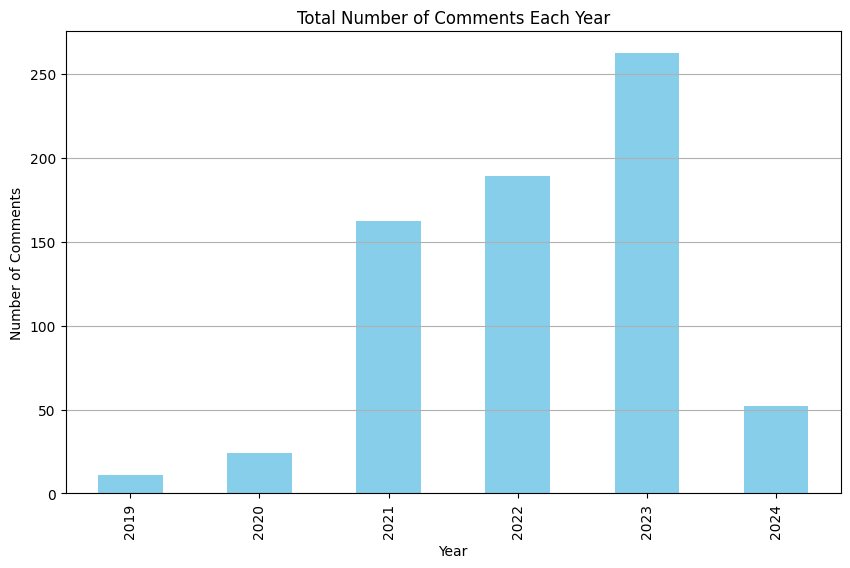

In [ ]:
# Group by year and count the number of comments
yearly_comments = df.groupby(df['Date'].dt.year).size()

# Display the total number of comments in each year
print("Total Number of Comments in Each Year:")
print(yearly_comments)

# Plot the bar graph
plt.figure(figsize=(10, 6))
yearly_comments.plot(kind='bar', color='skyblue')
plt.title('Total Number of Comments Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Comments')
plt.grid(axis='y')
plt.show()

In [ ]:
# Filter the DataFrame for the years 2021, 2022, 2023, and 2024
selected_years = [2021, 2022, 2023, 2024]
df_selected_years = df[df['Date'].dt.year.isin(selected_years)]

# Display the new DataFrame containing data for the selected years
print("DataFrame for the Selected Years:")
print(df_selected_years.head())

DataFrame for the Selected Years:
        Unnamed: 0    ItemCode  Rating  \
102836      102836  S9lsdanMmz     5.0   
102838      102838  S9lsdanMmz     5.0   
102839      102839  S9lsdanMmz     4.0   
102842      102842  S9lsdanMmz     5.0   
102843      102843  S9lsdanMmz     5.0   

                                                   Review  \
102836  Nice fittings, it gives an perfect shape to yo...   
102838                       I m in love with this tights   
102839                                       Nice product   
102842                                  Love this one❤️💙💛   
102843                        Great product for the price   

                      UserName Month  Year    UserCertified  \
102836          Sakshi  Ramesh   Sep  2021  Certified Buyer   
102838  Sayani  Nandi Mazumdar   Mar  2021  Certified Buyer   
102839               Raj Kumar   Jul  2023  Certified Buyer   
102842      Priyanka  Karmakar   May  2023  Certified Buyer   
102843               Pooja Jha 

<Figure size 1200x600 with 0 Axes>

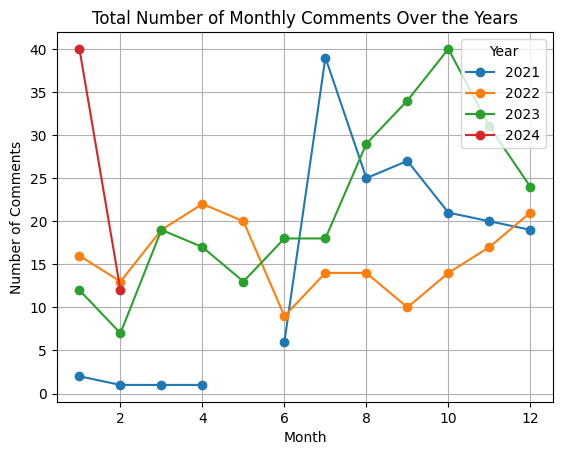

In [ ]:
# Group by month and year and count the number of comments
monthly_comments_over_years = df_selected_years.groupby([df_selected_years['Date'].dt.year, df_selected_years['Date'].dt.month]).size()

# Reshape the data for better plotting
monthly_comments_over_years = monthly_comments_over_years.unstack(level=0)

# Plot the line graph
plt.figure(figsize=(12, 6))
monthly_comments_over_years.plot(marker='o')
plt.title('Total Number of Monthly Comments Over the Years')
plt.xlabel('Month')
plt.ylabel('Number of Comments')
plt.legend(title='Year', loc='upper right')
plt.grid(True)
plt.show()

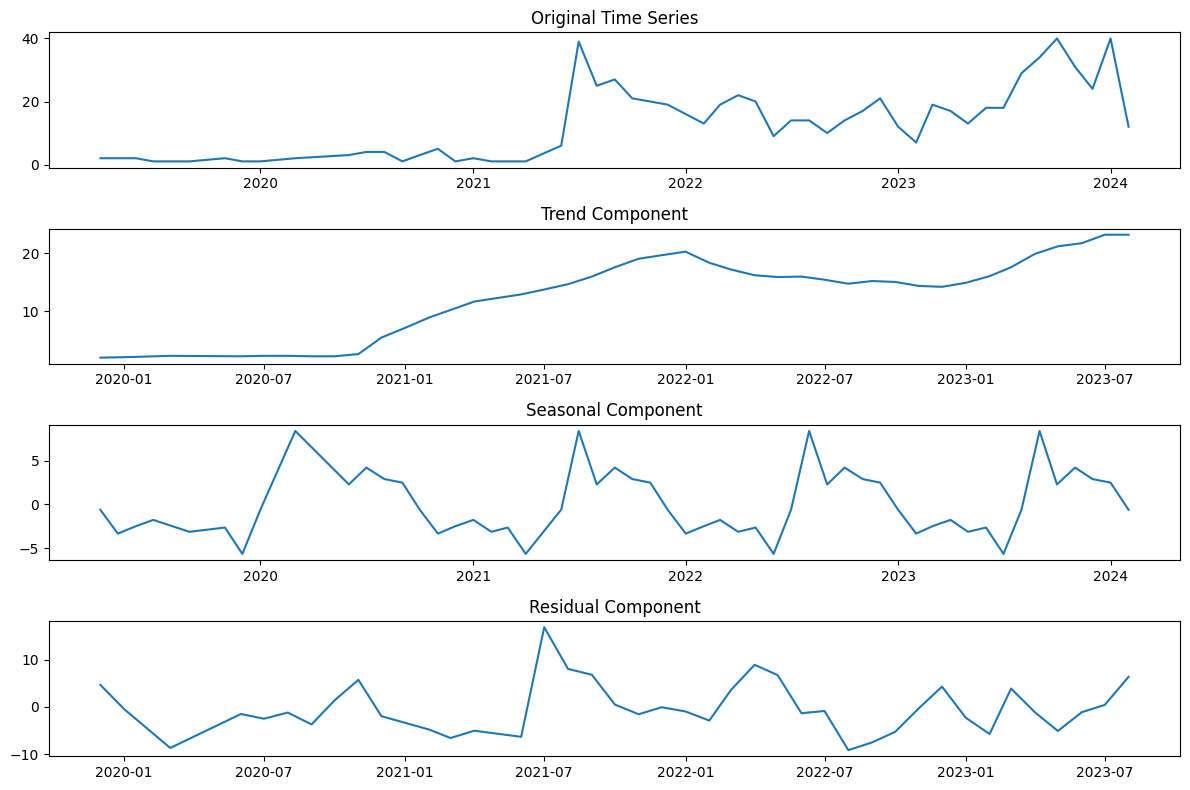

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Extract the time series data
time_series_data = df.groupby('Date').size()

# Perform STL decomposition
stl_result = seasonal_decompose(time_series_data, period=13)

# Plot the decomposition
plt.figure(figsize=(12, 8))

# Original time series
plt.subplot(4, 1, 1)
plt.plot(time_series_data)
plt.title('Original Time Series')

# Trend component
plt.subplot(4, 1, 2)
plt.plot(stl_result.trend)
plt.title('Trend Component')

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(stl_result.seasonal)
plt.title('Seasonal Component')

# Residual component
plt.subplot(4, 1, 4)
plt.plot(stl_result.resid)
plt.title('Residual Component')

plt.tight_layout()
plt.show()

<Figure size 1200x400 with 0 Axes>

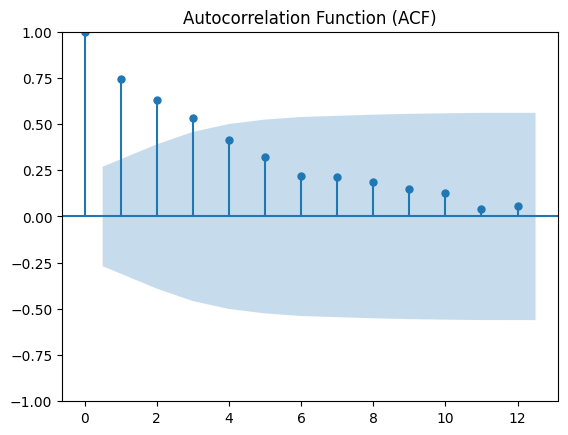

<Figure size 1200x400 with 0 Axes>

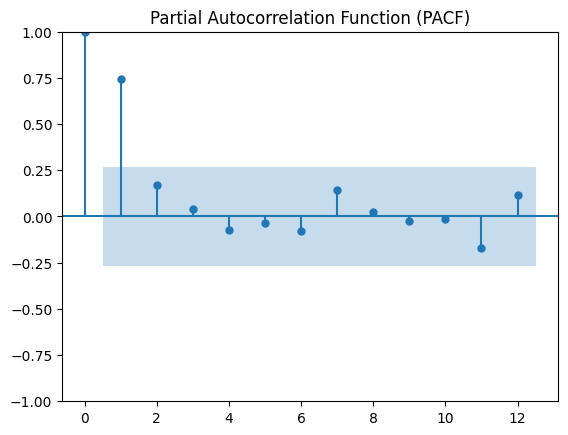

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Plot autocorrelation function (ACF)
plt.figure(figsize=(12, 4))
plot_acf(time_series_data, lags=12, title='Autocorrelation Function (ACF)')
plt.show()

# Plot partial autocorrelation function (PACF)
plt.figure(figsize=(12, 4))
plot_pacf(time_series_data, lags=12, title='Partial Autocorrelation Function (PACF)')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10

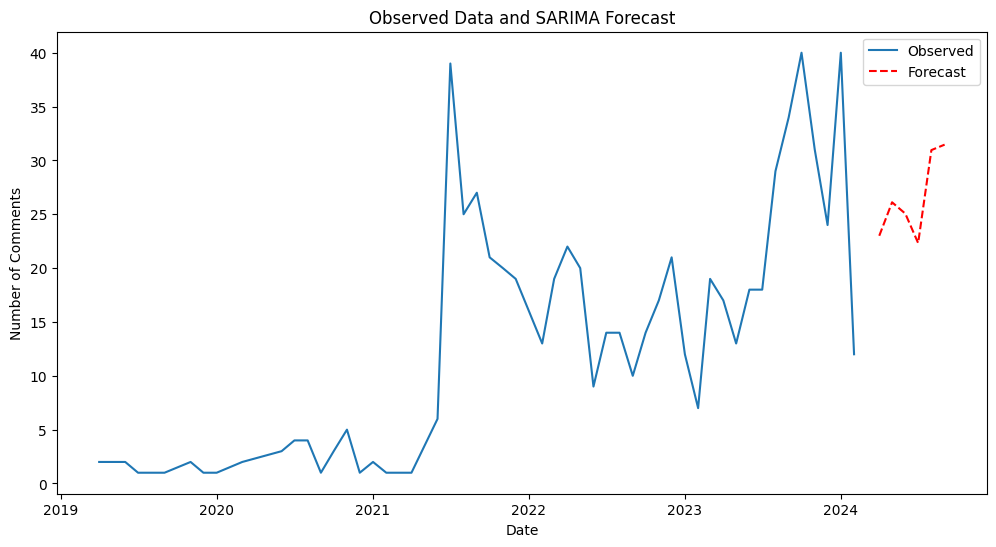

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
sarima_model = SARIMAX(time_series_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit(disp=False)

# Forecast future values
forecast_steps = 6  # Adjust the number of steps for forecasting
forecast_index = pd.date_range(start=time_series_data.index[-1], periods=forecast_steps + 1, freq='M')[1:]
forecast = sarima_result.get_forecast(steps=forecast_steps).predicted_mean

# Plot observed data and forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series_data.index, time_series_data, label='Observed')
plt.plot(forecast_index, forecast, label='Forecast', linestyle='--', color='red')

plt.title('Observed Data and SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.legend()
plt.show()